((np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0)),
 Text(0.5, 1.0, 'Original image (250 colors)'),
 <matplotlib.image.AxesImage at 0x22f4e853230>)

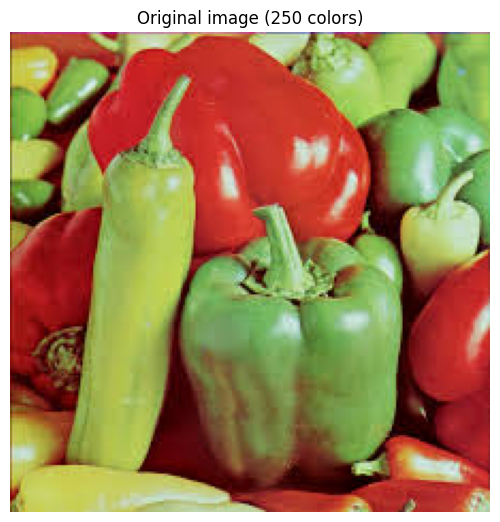

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float
from time import time

pepper = imread("images/pepper.jpg")
# Display the original image
plt.figure(1), plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off'), plt.title('Original image (%d colors)'
%(len(np.unique(pepper)))), plt.imshow(pepper)

c:\Users\vuklu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\vuklu\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\vuklu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\vuklu\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

K=64: K-Means fitting done in 0.095s.
K=64: Predicting color indices done in 0.004s.
K=32: K-Means fitting done in 0.022s.
K=32: Predicting color indices done in 0.004s.
K=16: K-Means fitting done in 0.022s.
K=16: Predicting color indices done in 0.004s.
K=4: K-Means fitting done in 0.020s.
K=4: Predicting color indices done in 0.003s.


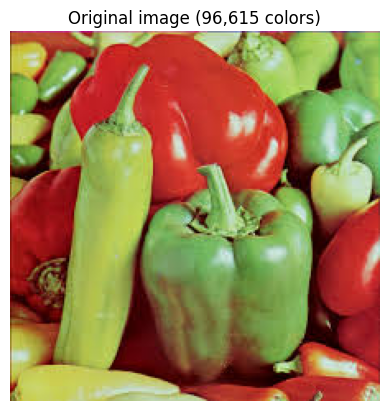

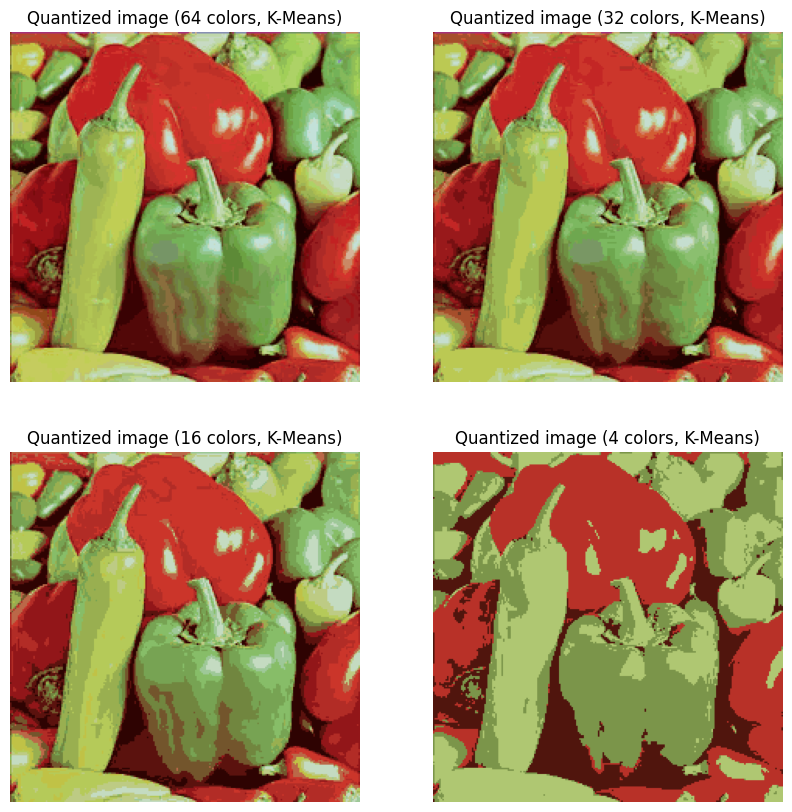

K=64: Random quantization done in 0.014s.
K=32: Random quantization done in 0.013s.
K=16: Random quantization done in 0.014s.
K=4: Random quantization done in 0.014s.


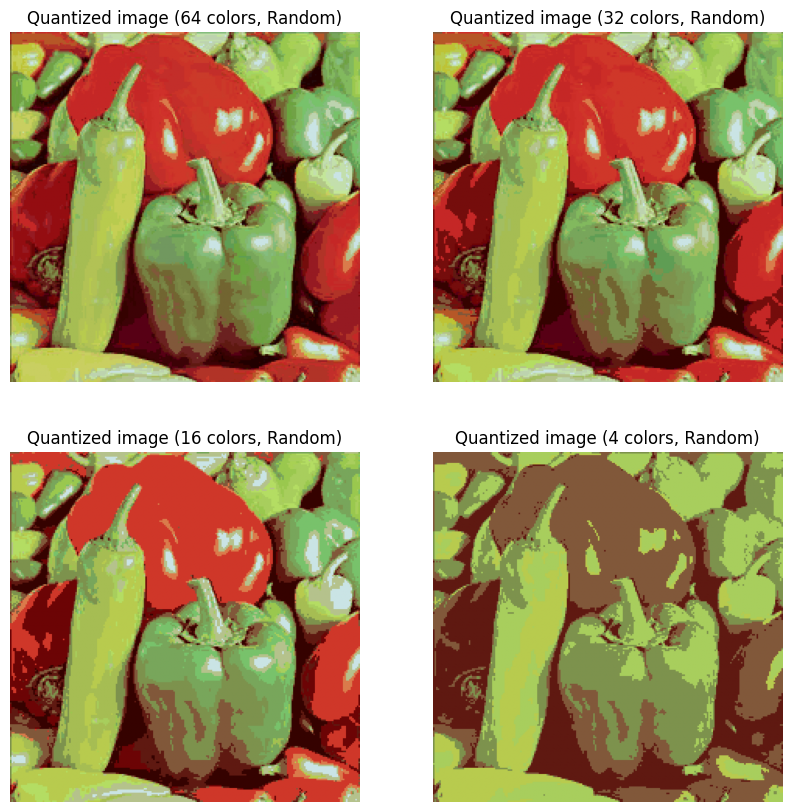

In [6]:
# Định số màu giảm
n_colors = 64

# Đọc ảnh pepper (giả sử đã được cung cấp) và chuẩn hóa dữ liệu về dạng float (giá trị từ 0 đến 1)
pepper = plt.imread('images/pepper.jpg') 
pepper = np.array(pepper, dtype=np.float64) / 255  # Chuyển đổi dữ liệu ảnh sang float64 và chuẩn hóa

# Chuyển đổi ảnh thành mảng 2D (mỗi hàng là một pixel với 3 giá trị RGB)
w, h, d = original_shape = tuple(pepper.shape)
assert d == 3  # Đảm bảo ảnh có 3 kênh (RGB)
image_array = np.reshape(pepper, (w * h, d))  # Reshape thành (số pixel x 3)

# Hàm tái tạo ảnh từ codebook và nhãn
def recreate_image(codebook, labels, w, h):
    """Tái tạo ảnh từ codebook và nhãn."""
    d = codebook.shape[1]  # Số chiều của không gian màu (RGB)
    image = np.zeros((w, h, d))  # Tạo mảng ảnh mới với các giá trị bằng 0
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]  # Gán màu từ codebook
            label_idx += 1
    return image

# Hiển thị ảnh gốc
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(pepper)

# Giảm màu bằng K-Means
plt.figure(2, figsize=(10, 10))
plt.clf()
i = 1

for k in [64, 32, 16, 4]:  # Các số lượng màu cần giảm
    t0 = time()
    plt.subplot(2, 2, i)
    plt.axis('off')

    # Lấy mẫu ngẫu nhiên 1000 pixel từ ảnh để tăng tốc K-Means
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    
    # Áp dụng K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print(f"K={k}: K-Means fitting done in {time() - t0:.3f}s.")
    
    # Dự đoán nhãn cho toàn bộ pixel trong ảnh
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"K={k}: Predicting color indices done in {time() - t0:.3f}s.")
    
    # Hiển thị ảnh sau khi giảm màu bằng K-Means
    plt.title(f'Quantized image ({k} colors, K-Means)')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    i += 1

plt.show()

# Giảm màu bằng cách chọn màu ngẫu nhiên
plt.figure(3, figsize=(10, 10))
plt.clf()
i = 1

for k in [64, 32, 16, 4]:  # Các số lượng màu cần giảm
    t0 = time()
    plt.subplot(2, 2, i)
    plt.axis('off')

    # Chọn ngẫu nhiên codebook với k màu
    codebook_random = shuffle(image_array, random_state=0)[:k + 1]
    
    # Gán nhãn dựa trên khoảng cách ngắn nhất (Euclidean)
    labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
    print(f"K={k}: Random quantization done in {time() - t0:.3f}s.")
    
    # Hiển thị ảnh sau khi giảm màu bằng cách chọn ngẫu nhiên
    plt.title(f'Quantized image ({k} colors, Random)')
    plt.imshow(recreate_image(codebook_random, labels_random, w, h))
    i += 1

plt.show()


C:\Users\vuklu\AppData\Local\Temp\ipykernel_2172\1366823299.py:38: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels == 0, contours=1, colors='red')  # Vẽ đường viền cụm
C:\Users\vuklu\AppData\Local\Temp\ipykernel_2172\1366823299.py:62: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(labels == 0, contours=1, colors='red')  # Vẽ đường viền cụm


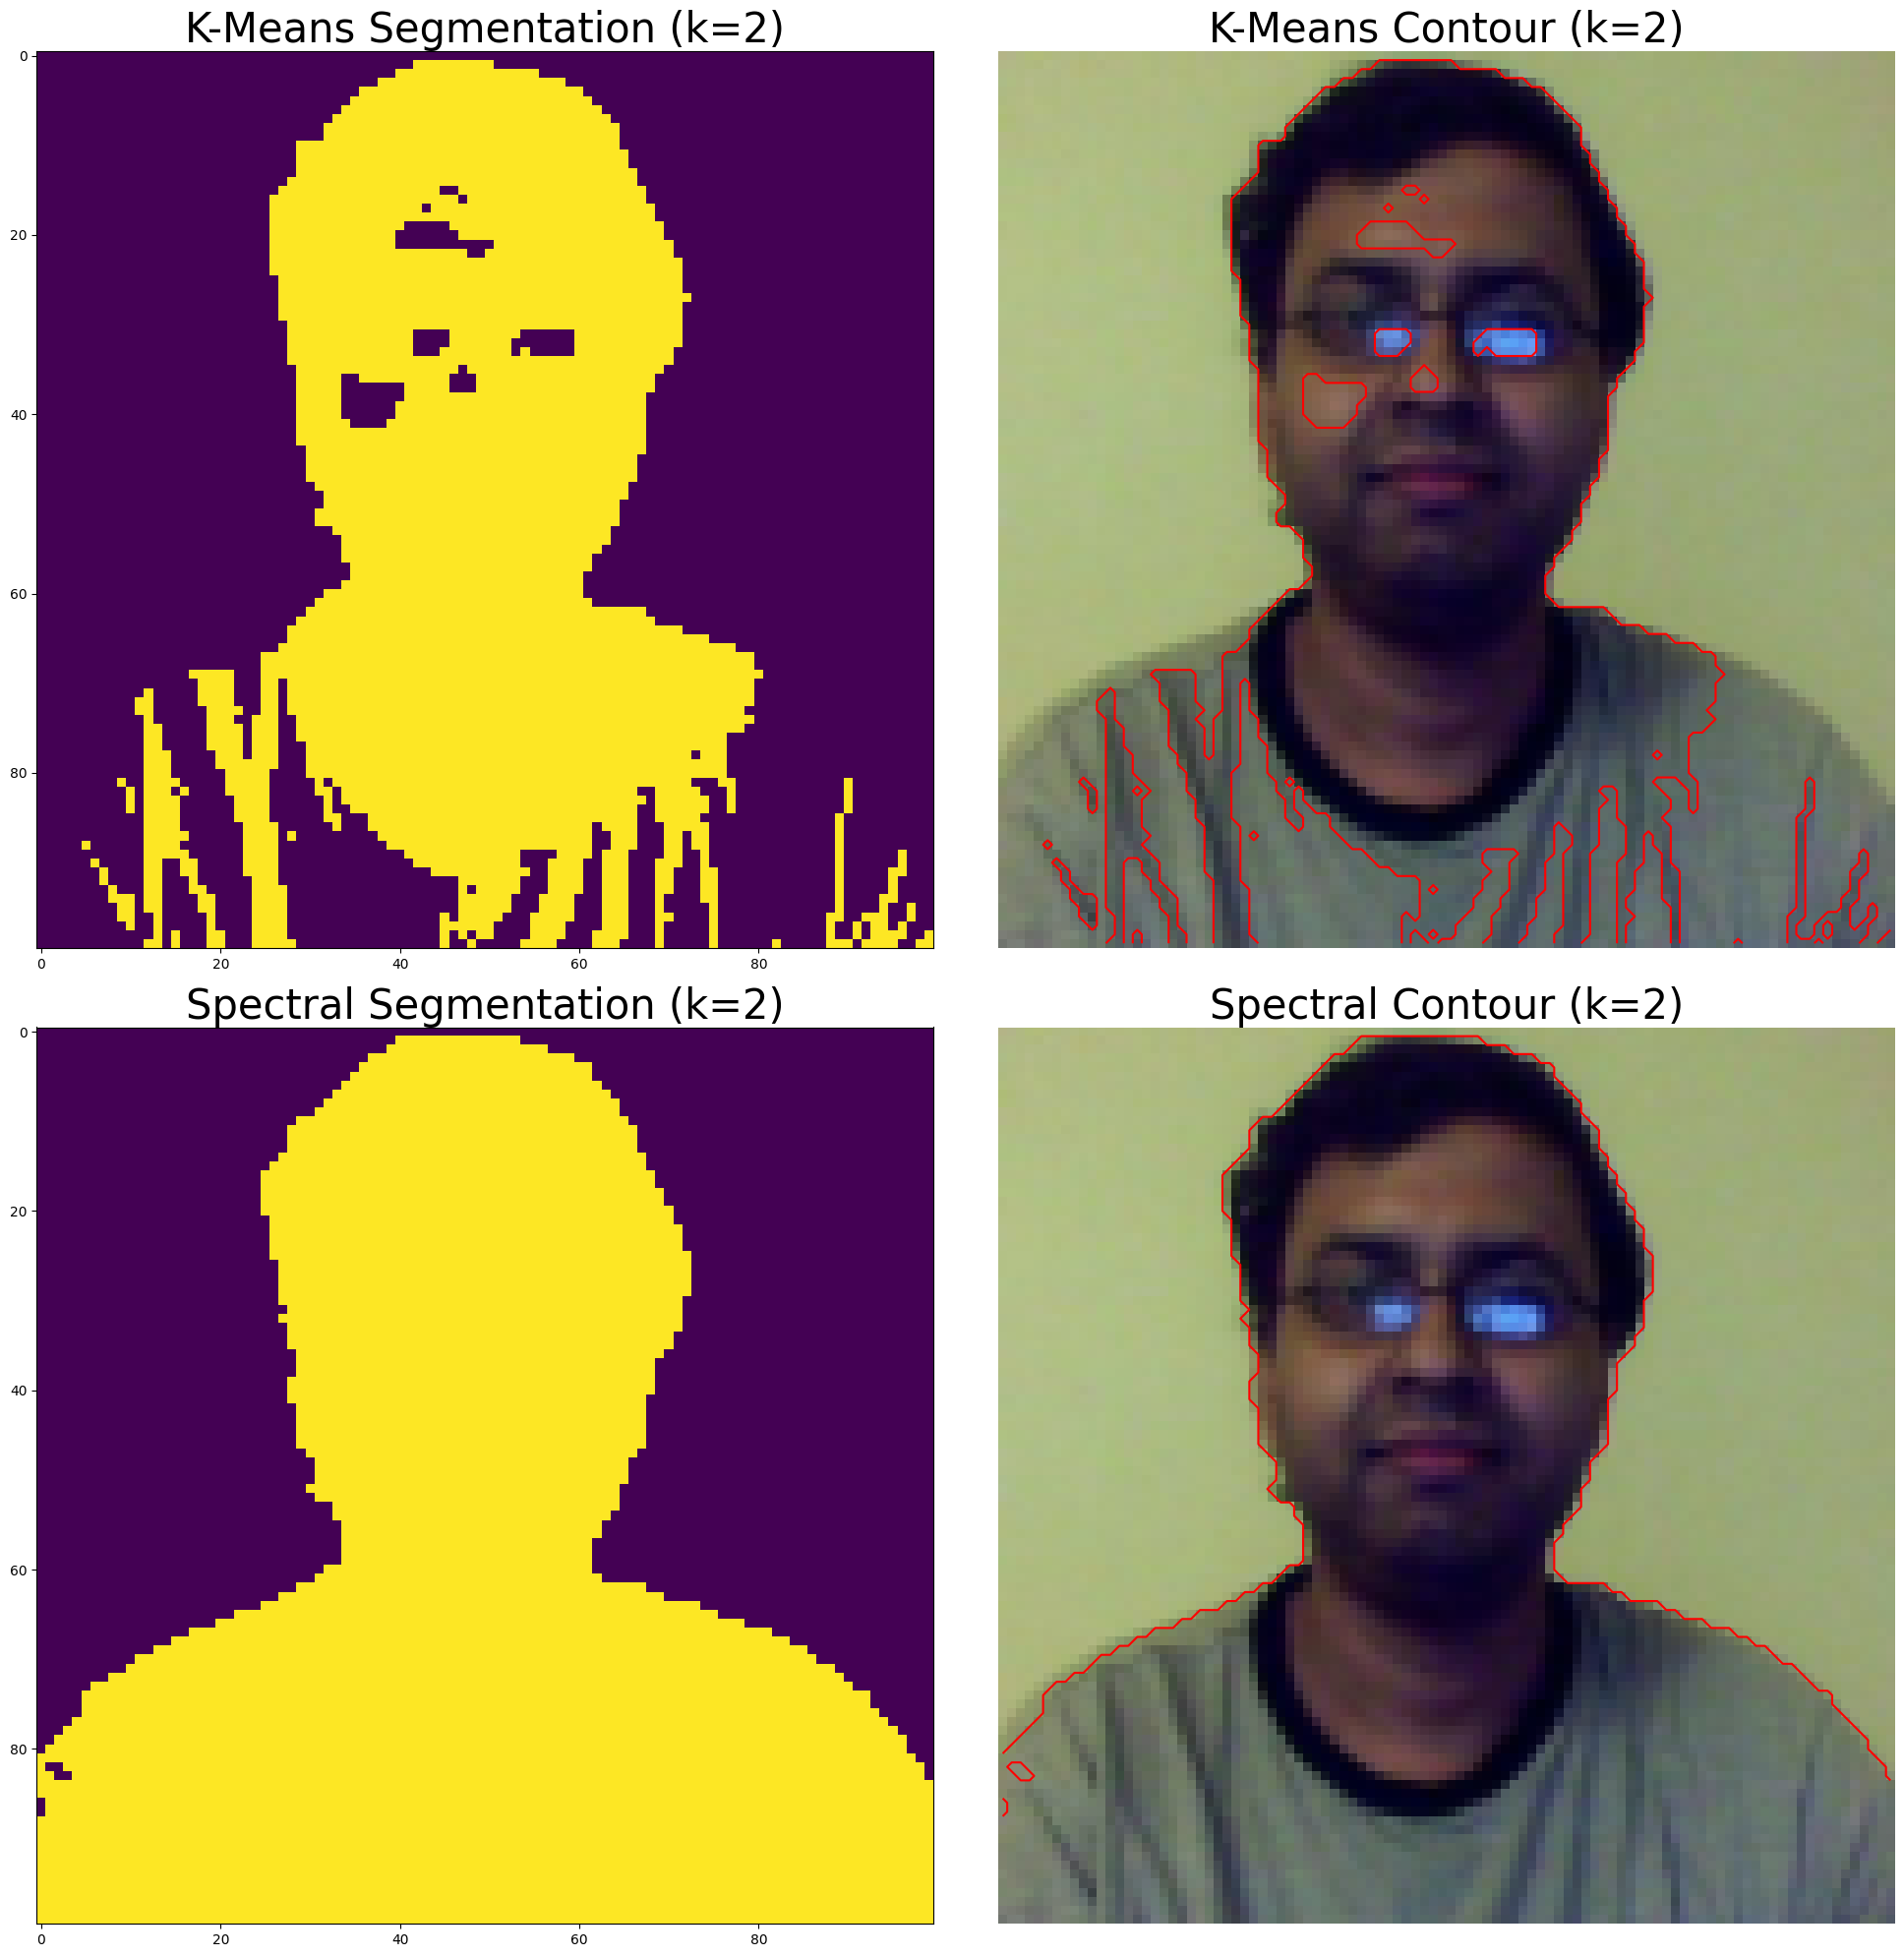

In [8]:
import numpy as np
from sklearn import cluster
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize 
import matplotlib.pyplot as plt

# Đọc và xử lý hình ảnh
# Đọc ảnh từ đường dẫn và thay đổi kích thước ảnh về (100x100x3)
im = resize(imread('images/me14.jpg'), (100, 100, 3), anti_aliasing=True)

# Chuyển ảnh RGB sang ảnh grayscale
img = rgb2gray(im)

# Khởi tạo số cụm (segments) cho phân đoạn
k = 2  # Phân đoạn nhị phân với 2 cụm

# Chuyển đổi ảnh sang mảng 2D (mỗi hàng là một pixel với 3 giá trị RGB)
X = np.reshape(im, (-1, im.shape[-1]))

# Phân đoạn ảnh bằng K-Means
two_means = cluster.MiniBatchKMeans(n_clusters=k, random_state=10)
two_means.fit(X)  # Huấn luyện mô hình K-Means
y_pred = two_means.predict(X)  # Dự đoán cụm cho từng pixel
labels = np.reshape(y_pred, im.shape[:2])  # Chuyển nhãn về kích thước của ảnh gốc

# Hiển thị kết quả phân đoạn bằng K-Means
plt.figure(figsize=(20, 20))

# Hiển thị kết quả phân đoạn K-Means
plt.subplot(221)
plt.imshow(np.reshape(y_pred, im.shape[:2]))
plt.title('K-Means Segmentation (k=2)', size=30)

# Hiển thị ảnh gốc với đường viền cụm
plt.subplot(222)
plt.imshow(im)
plt.contour(labels == 0, contours=1, colors='red')  # Vẽ đường viền cụm
plt.axis('off')
plt.title('K-Means Contour (k=2)', size=30)

# Phân đoạn ảnh bằng Spectral Clustering
spectral = cluster.SpectralClustering(
    n_clusters=k,
    eigen_solver='arpack',
    affinity="nearest_neighbors",
    n_neighbors=10,  # Số lượng láng giềng gần nhất để tính affinity
    random_state=10
)
spectral.fit(X)  # Huấn luyện mô hình Spectral Clustering
y_pred = spectral.labels_.astype(int)  # Thay `np.int` bằng `int`
labels = np.reshape(y_pred, im.shape[:2])  # Chuyển nhãn về kích thước của ảnh gốc

# Hiển thị kết quả phân đoạn bằng Spectral Clustering
plt.subplot(223)
plt.imshow(np.reshape(y_pred, im.shape[:2]))
plt.title('Spectral Segmentation (k=2)', size=30)

# Hiển thị ảnh gốc với đường viền cụm
plt.subplot(224)
plt.imshow(im)
plt.contour(labels == 0, contours=1, colors='red')  # Vẽ đường viền cụm
plt.axis('off')
plt.title('Spectral Contour (k=2)', size=30)

# Hiển thị tất cả các hình
plt.tight_layout()
plt.show()


Shape of digits data: (1797, 64)


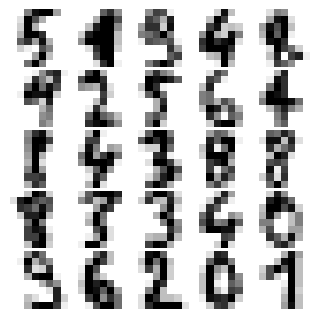

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Tải bộ dữ liệu chữ số (digits)
digits = load_digits()

# In ra kích thước của dữ liệu (1797 mẫu, mỗi mẫu có 64 đặc trưng - 8x8 pixel)
print("Shape of digits data:", digits.data.shape)

# Đặt seed cho bộ sinh số ngẫu nhiên để kết quả có thể tái tạo
np.random.seed(1)

# Khởi tạo chỉ số cho subplot
j = 1

# Tạo một figure có kích thước 3x3 inch
fig = plt.figure(figsize=(3, 3))

# Điều chỉnh khoảng cách giữa các subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Chọn ngẫu nhiên 25 hình từ bộ dữ liệu để hiển thị
for i in np.random.choice(digits.data.shape[0], 25):
    # Tạo subplot và hiển thị từng hình ảnh (8x8 pixel)
    plt.subplot(5, 5, j)
    plt.imshow(np.reshape(digits.data[i, :], (8, 8)), cmap='binary')  # Hiển thị hình ảnh với thang màu đen trắng
    plt.axis('off')  # Tắt trục tọa độ
    j += 1

# Hiển thị tất cả hình ảnh
plt.show()


Explained variance by the first 2 principal components: 0.2850936482369929


C:\Users\vuklu\AppData\Local\Temp\ipykernel_2172\1481310759.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('cubehelix', 10)  # Bản đồ màu 'cubehelix' với 10 màu


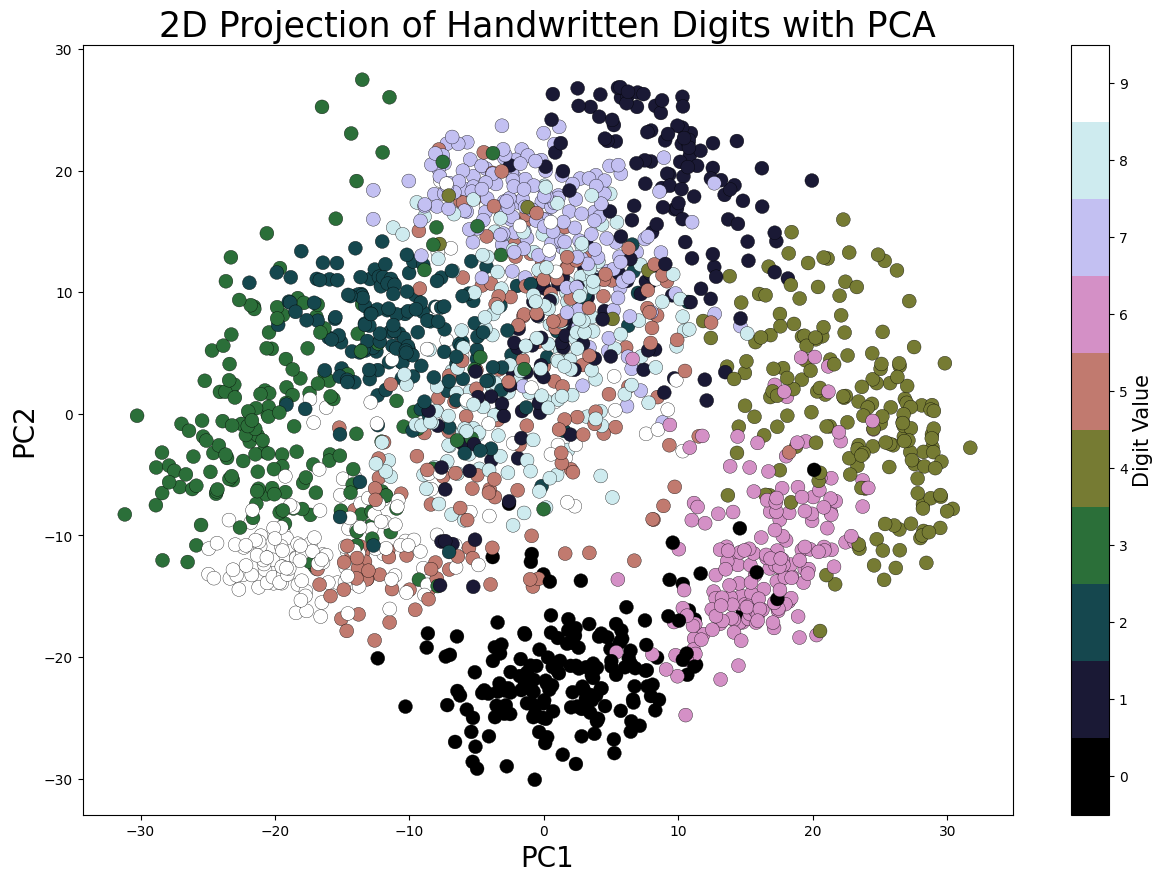

In [11]:
from sklearn.decomposition import PCA
# Tải dữ liệu chữ số viết tay (digits)
digits = load_digits()

# Áp dụng PCA để giảm chiều dữ liệu xuống 2 chiều
pca_digits = PCA(n_components=2)  # Giảm xuống 2 thành phần chính
digits_data_proj = pca_digits.fit_transform(digits.data)  # Dữ liệu sau PCA

# Tính tổng tỷ lệ phương sai được giải thích bởi 2 thành phần chính
explained_variance = np.sum(pca_digits.explained_variance_ratio_)
print("Explained variance by the first 2 principal components:", explained_variance)
# Kết quả: 0.28509364823696987

# Hiển thị dữ liệu sau PCA trên biểu đồ scatter plot
plt.figure(figsize=(15, 10))

# Biểu diễn dữ liệu sau PCA với màu sắc tương ứng với giá trị chữ số
scatter = plt.scatter(
    digits_data_proj[:, 0],  # Trục PC1
    digits_data_proj[:, 1],  # Trục PC2
    lw=0.25,                 # Độ dày viền điểm
    c=digits.target,         # Màu sắc dựa trên giá trị chữ số
    edgecolor='k',           # Màu viền đen
    s=100,                   # Kích thước điểm
    cmap=plt.cm.get_cmap('cubehelix', 10)  # Bản đồ màu 'cubehelix' với 10 màu
)

# Gán nhãn và tiêu đề cho biểu đồ
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.title('2D Projection of Handwritten Digits with PCA', size=25)

# Thêm thanh màu (colorbar) để hiển thị giá trị chữ số
colorbar = plt.colorbar(scatter, ticks=range(10), label='Digit Value')
colorbar.ax.set_ylabel('Digit Value', size=15)
plt.clim(-0.5, 9.5)  # Đặt giới hạn cho thanh màu

# Hiển thị biểu đồ
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\vuklu\scikit_learn_data
Shape of the faces dataset: (400, 4096)


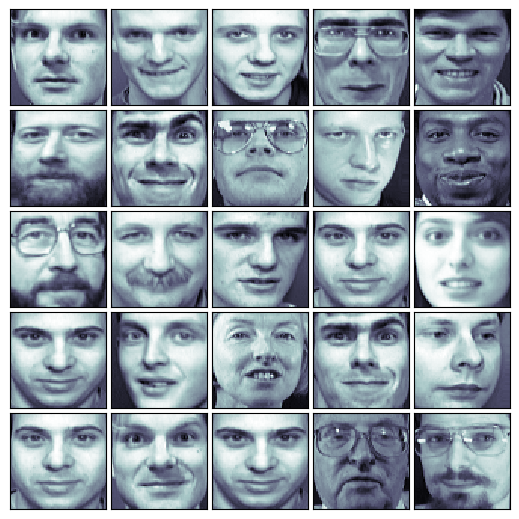

In [12]:
from sklearn.datasets import fetch_olivetti_faces

# Tải bộ dữ liệu Olivetti Faces
faces = fetch_olivetti_faces().data  # Lấy dữ liệu khuôn mặt (dưới dạng mảng)
print("Shape of the faces dataset:", faces.shape)
# (400, 4096): 400 khuôn mặt, mỗi khuôn mặt được biểu diễn bằng 64x64 = 4096 pixels

# Tạo một figure để hiển thị các khuôn mặt
fig = plt.figure(figsize=(5, 5))

# Điều chỉnh khoảng cách giữa các subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Hiển thị 25 khuôn mặt ngẫu nhiên từ dữ liệu
np.random.seed(0)  # Đặt seed để đảm bảo kết quả ngẫu nhiên có thể tái tạo
j = 1  # Biến đếm để đặt vị trí của subplot

for i in np.random.choice(range(faces.shape[0]), 25):  # Chọn ngẫu nhiên 25 khuôn mặt
    # Tạo subplot cho từng khuôn mặt
    ax = fig.add_subplot(5, 5, j, xticks=[], yticks=[])  # Tắt trục x và y
    ax.imshow(
        np.reshape(faces[i, :], (64, 64)),  # Chuyển đổi khuôn mặt từ vector 1D (4096) thành ma trận 2D (64x64)
        cmap=plt.cm.bone,  # Sử dụng bản đồ màu 'bone' để hiển thị hình ảnh
        interpolation='nearest'  # Hiển thị các pixel một cách rõ ràng
    )
    j += 1

# Hiển thị các khuôn mặt
plt.show()


Shape of projected faces: (400, 64)


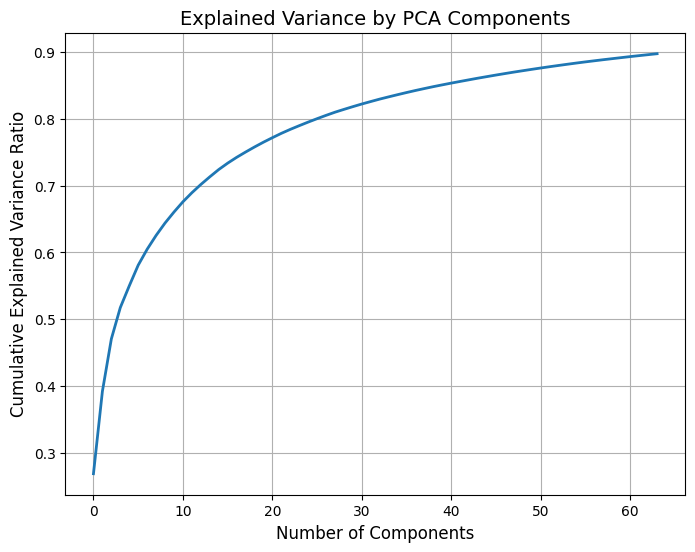

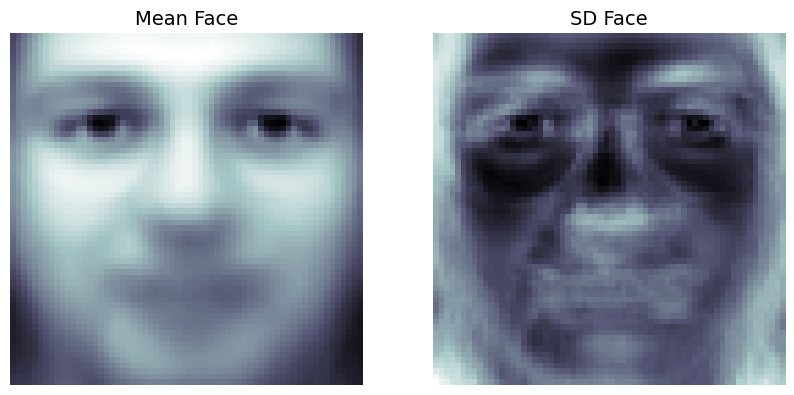

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Số lượng thành phần chính PCA
n_comp = 64

# Tạo pipeline gồm StandardScaler và PCA
pipeline = Pipeline([
    ('scaling', StandardScaler()),  # Chuẩn hóa dữ liệu
    ('pca', PCA(n_components=n_comp))  # PCA với 64 thành phần chính
])

# Áp dụng pipeline lên dữ liệu khuôn mặt
faces_proj = pipeline.fit_transform(faces)  # Giảm chiều dữ liệu
print("Shape of projected faces:", faces_proj.shape)  # (400, 64)

# Lấy khuôn mặt trung bình (mean face) và độ lệch chuẩn (SD face)
mean_face = np.reshape(pipeline.named_steps['scaling'].mean_, (64, 64))
sd_face = np.reshape(np.sqrt(pipeline.named_steps['scaling'].var_), (64, 64))

# Vẽ biểu đồ tỷ lệ phương sai cộng dồn
plt.figure(figsize=(8, 6))
plt.plot(
    np.cumsum(pipeline.named_steps['pca'].explained_variance_ratio_),  # Phương sai cộng dồn
    linewidth=2
)
plt.grid()
plt.axis('tight')
plt.xlabel('Number of Components', size=12)
plt.ylabel('Cumulative Explained Variance Ratio', size=12)
plt.title('Explained Variance by PCA Components', size=14)
plt.show()

# Hiển thị khuôn mặt trung bình và độ lệch chuẩn
plt.figure(figsize=(10, 5))

# Khuôn mặt trung bình
plt.subplot(1, 2, 1)
plt.imshow(mean_face, cmap=plt.cm.bone)
plt.axis('off')
plt.title('Mean Face', size=14)

# Độ lệch chuẩn của các pixel
plt.subplot(1, 2, 2)
plt.imshow(sd_face, cmap=plt.cm.bone)
plt.axis('off')
plt.title('SD Face', size=14)

plt.show()


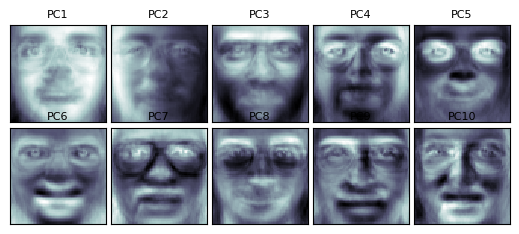

In [14]:
# Tạo một figure với kích thước 5x2 inch
fig = plt.figure(figsize=(5, 2))

# Điều chỉnh khoảng cách giữa các subplots
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Hiển thị 10 eigenfaces đầu tiên
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])  # Tạo lưới 2x5
    ax.imshow(
        np.reshape(pipeline.named_steps['pca'].components_[i, :], (64, 64)),  # Eigenface (thành phần PCA)
        cmap=plt.cm.bone,  # Sử dụng bản đồ màu 'bone' để hiển thị
        interpolation='nearest'  # Giữ nguyên chi tiết pixel
    )
    ax.set_title(f"PC{i+1}", fontsize=8)  # Tiêu đề cho mỗi eigenface

# Hiển thị figure
plt.show()


In [5]:
%matplotlib inline
import gzip, os, sys
import numpy as np
from scipy.stats import multivariate_normal
from urllib.request import urlretrieve
import matplotlib.pyplot as pylab

In [2]:
import os
import gzip
import numpy as np
from urllib.request import urlretrieve

# Hàm tải xuống tệp dữ liệu MNIST từ Google Cloud Storage
def download(filename, source='https://storage.googleapis.com/cvdf-datasets/mnist/'):
    print("Đang tải xuống %s" % filename)
    urlretrieve(source + filename, filename)

# Gọi hàm download() nếu cần, sau đó đọc ảnh
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Tải bộ dữ liệu huấn luyện
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

# Tải bộ dữ liệu kiểm tra
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

print(train_data.shape)
# (60000, 784)
print(test_data.shape)
# (10000, 784)

Đang tải xuống train-images-idx3-ubyte.gz
Đang tải xuống train-labels-idx1-ubyte.gz
Đang tải xuống t10k-images-idx3-ubyte.gz
Đang tải xuống t10k-labels-idx1-ubyte.gz
(60000, 784)
(10000, 784)


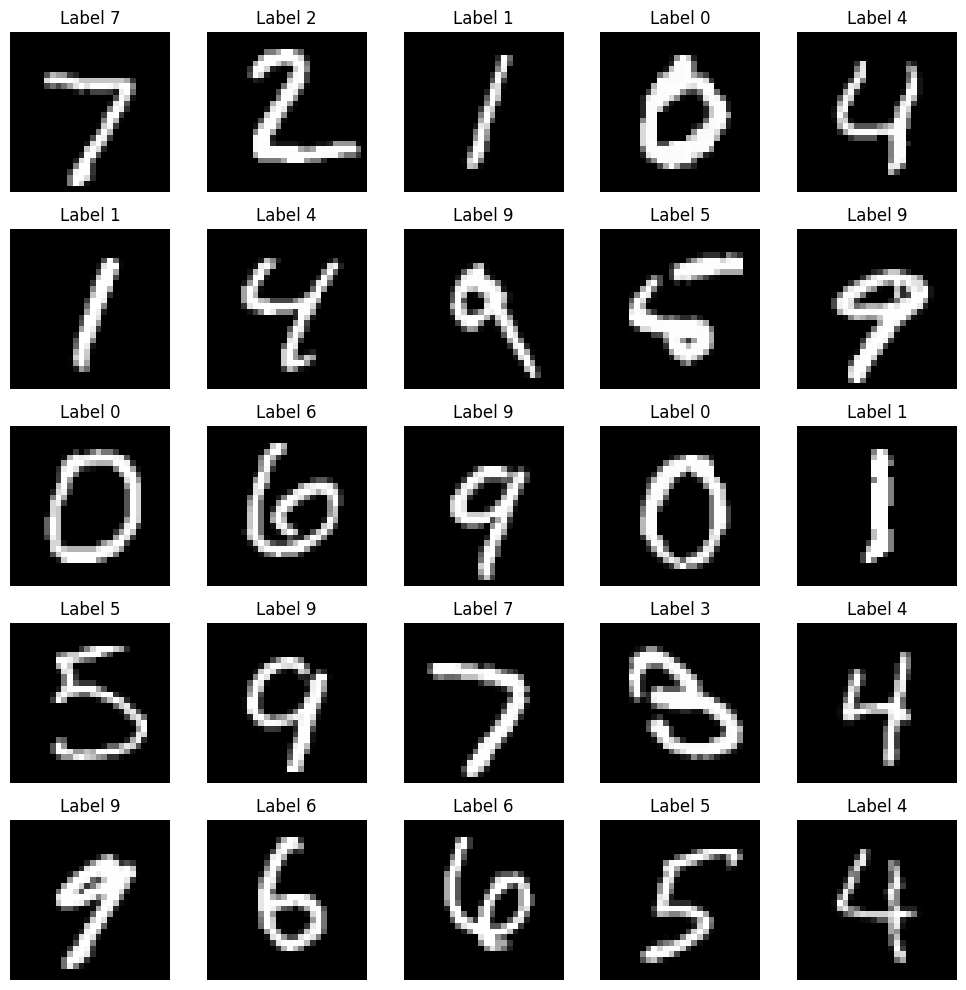

In [ ]:
# Định nghĩa hàm hiển thị một chữ số từ vector đại diện của nó
def show_digit(x, label):
    """
    Hiển thị một chữ số viết tay từ vector dữ liệu với nhãn tương ứng.
    
    Args:
    - x: Vector dữ liệu đại diện cho một hình ảnh chữ số (784 pixel, dạng 1D).
    - label: Nhãn (số nguyên) tương ứng với chữ số trong hình ảnh.
    """
    pylab.axis('off')  # Tắt hiển thị các trục x, y
    pylab.imshow(x.reshape((28, 28)), cmap=pylab.cm.gray)  # Hiển thị hình ảnh, định dạng 28x28 pixel, thang màu xám
    pylab.title('Label ' + str(label))  # Đặt tiêu đề cho hình ảnh, là nhãn của chữ số

# Thiết lập một biểu đồ để hiển thị nhiều chữ số
pylab.figure(figsize=(10, 10))  # Tạo một canvas lớn với kích thước 10x10 inch

for i in range(25):  # Lặp qua 25 hình ảnh đầu tiên trong bộ dữ liệu kiểm tra
    pylab.subplot(5, 5, i+1)  # Tạo một ô subplot (5 hàng x 5 cột) và chọn ô thứ (i+1)
    show_digit(test_data[i,], test_labels[i])  # Gọi hàm để hiển thị chữ số và nhãn tương ứng

pylab.tight_layout()  # Tự động căn chỉnh các ô để không bị chồng lấn
pylab.show()  # Hiển thị biểu đồ trên màn hình


In [7]:
import time  # Thư viện để đo thời gian thực thi
from sklearn.neighbors import BallTree  # BallTree để tìm kiếm lân cận gần nhất

# Xây dựng cấu trúc dữ liệu BallTree trên dữ liệu huấn luyện
t_before = time.time()  # Lấy thời gian trước khi bắt đầu xây dựng
ball_tree = BallTree(train_data)  # Khởi tạo BallTree với dữ liệu huấn luyện
t_after = time.time()  # Lấy thời gian sau khi xây dựng

# Tính toán thời gian xây dựng BallTree
t_training = t_after - t_before
print("Thời gian xây dựng cấu trúc dữ liệu (giây): ", t_training)

# Lấy dự đoán lân cận gần nhất trên tập dữ liệu kiểm tra
t_before = time.time()  # Lấy thời gian trước khi bắt đầu dự đoán

# `query` tìm k lân cận gần nhất, ở đây `k=1` nghĩa là chỉ tìm một điểm gần nhất
# `return_distance=False` để chỉ trả về chỉ số lân cận, không cần khoảng cách
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))

# Lấy nhãn dự đoán từ nhãn tập huấn luyện dựa trên chỉ số lân cận
test_predictions = train_labels[test_neighbors]

t_after = time.time()  # Lấy thời gian sau khi hoàn thành dự đoán

# Tính toán thời gian phân loại
t_testing = t_after - t_before
print("Thời gian phân loại tập kiểm tra (giây): ", t_testing)

# In kết quả dự kiến (nếu bạn muốn kiểm tra)
print("Ví dụ dự đoán:", test_predictions[:10])  # Hiển thị 10 dự đoán đầu tiên


Thời gian xây dựng cấu trúc dữ liệu (giây):  4.790096282958984
Thời gian phân loại tập kiểm tra (giây):  475.4672508239746
Ví dụ dự đoán: [7 2 1 0 4 1 4 9 5 9]


Độ chính xác của mô hình: 96.91%


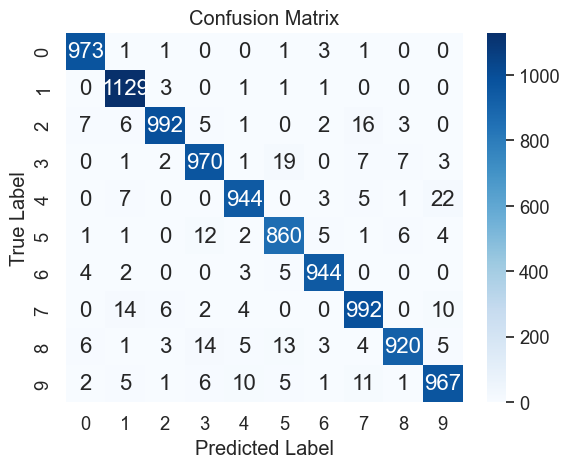

In [10]:
# Đánh giá độ chính xác của bộ phân loại
t_accuracy = sum(test_predictions == test_labels) / float(len(test_labels))  # Tính độ chính xác
print("Độ chính xác của mô hình: {:.2f}%".format(t_accuracy * 100))  # In kết quả chính xác dưới dạng phần trăm

# Tạo ma trận nhầm lẫn (Confusion Matrix) và trực quan hóa
import pandas as pd  # Thư viện xử lý dữ liệu dạng bảng
import seaborn as sn  # Thư viện để trực quan hóa dữ liệu
from sklearn import metrics  # Công cụ đánh giá mô hình
import matplotlib.pyplot as plt

# Tạo ma trận nhầm lẫn từ nhãn thực và nhãn dự đoán
cm = metrics.confusion_matrix(test_labels, test_predictions)

# Chuyển ma trận nhầm lẫn thành DataFrame để trực quan hóa dễ dàng hơn
df_cm = pd.DataFrame(cm, range(10), range(10))  # Cột và hàng đại diện cho 10 lớp (chữ số 0-9)

# Tùy chỉnh hiển thị với Seaborn
sn.set(font_scale=1.2)  # Điều chỉnh kích thước font chữ
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt="g", cmap="Blues")  # Vẽ biểu đồ ma trận nhầm lẫn
plt.title("Confusion Matrix")  # Thêm tiêu đề biểu đồ
plt.xlabel("Predicted Label")  # Nhãn trục X là nhãn dự đoán
plt.ylabel("True Label")  # Nhãn trục Y là nhãn thực tế
plt.show()  # Hiển thị biểu đồ
